# Credit Card fraud detection using SOM

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df=pd.read_csv("australian copy.csv")

In [44]:
df.head()

,ID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
0,1233434,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,1233435,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,1233436,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,1233437,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1233438,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [45]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [46]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)

In [47]:
from minisom import MiniSom
# randomly initialising the weight 
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)

In [48]:
#initialsing the weights
som.random_weights_init(X)

In [49]:
#training the SOM
som.train_random(data=X,num_iteration=100)

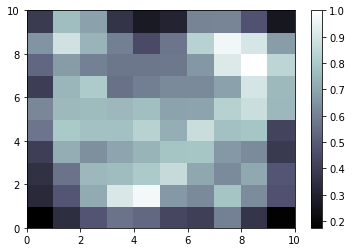

In [50]:
from pylab import bone,pcolor,colorbar,show
bone()
pcolor(som.distance_map())
colorbar()

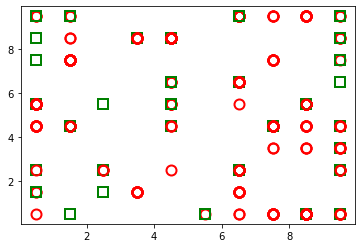

In [56]:
markers=['o','s']
colors=['r','g']
for i,x in enumerate(X):
    #winning node code
    w=som.winner(x)
    plt.plot(w[0]+0.5,
             w[1]+0.5,
             markers[y[i]],
             markeredgecolor=colors[y[i]],
             markerfacecolor='None',
             markersize=10,
             markeredgewidth=2)

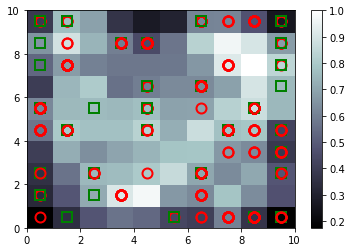

In [54]:
from pylab import bone,pcolor,colorbar,show
bone()
pcolor(som.distance_map())
colorbar()
markers=['o','s']
colors=['r','g']
for i,x in enumerate(X):
    #winning node code
    w=som.winner(x)
    plt.plot(w[0]+0.5,
             w[1]+0.5,
             markers[y[i]],
             markeredgecolor=colors[y[i]],
             markerfacecolor='None',
             markersize=10,
             markeredgewidth=2)

In [57]:
#since som doesnt  have any inverse transfomration mechanism for gettingtheoriginal coordinates
# we will generare the coordinates for all the winnig nodes 
#then out of all the winning nodes we will look in the outlier node
# and fetch the scaled instances coordinates

In [58]:
# generate the mapping for winners 
mappings=som.win_map(X)

In [59]:
mappings

defaultdict(list,
            {(8,
              5): [array([0.        , 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.0203193 , 1.        , 0.67413534, 0.09678571, 0.5       ,
                     0.53846154, 0.375     , 0.08473684, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.16      , 0.        ]), array([0.07256894, 1.        , 0.2793985 , 0.125     , 0.5       ,
                     0.23076923, 0.375     , 0.01754386, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.116     , 0.        ]), array([0.08708273, 1.        , 0.44240602, 0.17857143, 0.5       ,
                     0.15384615, 0.5       , 0.07894737, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.0705    , 0.        ]), array([0.11030479, 1. 

In [79]:
frauds=np.concatenate((mappings[(6,5)],mappings[(8,4)]),axis=0)
frauds

array([[4.49927431e-02, 0.00000000e+00, 1.00300752e-01, 3.75000000e-01,
        0.00000000e+00, 1.00000000e+00, 8.75000000e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        5.00000000e-01, 7.70000000e-02, 3.20000000e-04],
       [1.21915820e-01, 1.00000000e+00, 1.45413534e-01, 3.57142857e-02,
        5.00000000e-01, 5.38461538e-01, 3.75000000e-01, 1.75438596e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.40000000e-01, 0.00000000e+00],
       [1.30624093e-01, 1.00000000e+00, 2.10526316e-01, 4.60714286e-02,
        5.00000000e-01, 2.30769231e-01, 8.75000000e-01, 8.77192982e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 7.00000000e-02, 0.00000000e+00],
       [1.65457184e-01, 1.00000000e+00, 2.98195489e-01, 8.92857143e-03,
        5.00000000e-01, 1.53846154e-01, 5.00000000e-01, 1.40350877e-01,
        0.00000000e+00, 0.00000000e+0

In [80]:
frauds=sc.inverse_transform(frauds)

In [81]:
# get first possible customer attributes
frauds[0]

array([1.233465e+06, 0.000000e+00, 2.042000e+01, 1.050000e+01,
       1.000000e+00, 1.400000e+01, 8.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
       2.000000e+00, 1.540000e+02, 3.300000e+01])

In [82]:
# get customer id 

In [83]:
frauds[0][0]

1233465.0

In [84]:
frauds[0][-1]

33.0